# ***ABSTRACT***

En el siguiente trabajo, se plantean diversas hipótesis acerca de un dataset que contiene información relevante sobre la obesidad. El dataset elegido describe en sus variables algunos hábitos de la vida cotidiana de una muestra de personas, además de ciertos datos como sus pesos y alturas.

El objetivo de mi análisis sobre este conjunto de datos tiene como meta final establecer ciertos patrones y correlaciones que permitan identificar qué grupo de personas es más propenso a sufrir de sobrepeso. A continuación, se analizarán un par de relaciones entre las variables, que con suerte serán de ayuda para luego sacar una conclusión mayor. Además de evaluar qué cosas influyen en el desarrollo de la obesidad, se analizan relaciones entre otras variables, que pudieran mostrarnos por ejemplo que si una persona frecuentemente realiza un mal hábito, es probable que también se vea involucrado en otro mal hábito diferente.

Para comenzar a abordar las conexiones existentes entre las variables, se plantearán diferentes preguntas de interés que en un futuro espero que sirvan como guía para plantear nuevas preguntas y realizar un análisis más profundo. Para poder responder estas preguntas, elaboré una serie de gráficos que permitieron extraer respuestas interesantes.
Esto es así porque para muchas de ellas había formulado hipótesis que no se terminaron cumpliendo. Por esta razón, me parece fundamental seguir investigando una temática tan importante como lo es la obesidad, a través no solo de este dataset sino que de toda la información que se tenga disponible, dado que muchas de las percepciones que tenemos sobre esta problemática podrían ser erróneas.

Antes que nada, es necesario subir el dataset para comenzar con el análisis e importar las librerías que serán utilizadas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Storytelling_Jatar/ObesityDataSet_raw_and_data_sinthetic.csv')
df['IMC'] = df['Weight']/(df['Height']*df['Height'])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
shape = df.shape
print(f"El dataset cuenta con la siguiente estructura:{shape}, siendo el primer número la cantidad de filas y el segundo la cantidad de columnas")

El dataset cuenta con la siguiente estructura:(2111, 18), siendo el primer número la cantidad de filas y el segundo la cantidad de columnas


In [ ]:
print("Los tipos de variables del dataset son los siguientes:")
df.dtypes

Los tipos de variables del dataset son los siguientes:


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
IMC                               float64
dtype: object

*Diccionario de datos:*

**Variable 1:** Gender


*   Género de la persona

**Variable 2:** Age

*   Edad de la persona

**Variable 3:** Height
*   Altura de la persona

**Variable 4:** Weight

*   Peso de la persona

**Variable 5:** family_history_with_overweight

*   Describe si la persona tiene familia con sobrepeso

**Variable 6:** FAVC

*   Describe si la persona come o no con frecuencia comida calórica

**Variable 7:** FCVC

*   Frecuencia consumo de vegetales

**Variable 8:** NCP

*  Cantidad de comidas al día

**Variable 9:** CAEC


*   Consumo de alimentos entre medio de las comidas principales (snacks,etc)

**Variable 10:**Smoke

*   Describe si la persona fuma o no

**Variable 11:**CH20

*   Litros de agua consumidos en un dia

**Variable 12:** SCC

*   Describe si la persona cuenta o no las calorías que come en un día

**Variable 13:** FAF


*   Cantidad de veces que la persona realiza actividad física a la semana

**Variable 14:** TUE


*   Tiempo usando dispositivos tecnológicos

**Variable 15:**CALC

*   Frecuencia consumo de alcohol

**Variable 16:**MTRANS

*   Transporte usado con más frecuencia

**Variable 17:**NObeyesdad

*   Clasificación de tipo de peso

**Variable 18:**IMC

*   Índice de masa corporal




Antes de comenzar con cualquier tipo de dataset, comprobaremos si es necesario hacer una limpieza de datos.

In [ ]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
IMC                               0
dtype: int64


Primero observamos que no hay ningún valor faltante.

In [ ]:
hay_duplicados = df.duplicated().any()
if hay_duplicados:
    print("Hay duplicados en el DataFrame.")
else:
    print("No hay duplicados en el DataFrame.")

Hay duplicados en el DataFrame.


In [ ]:
df = df.drop_duplicates()
shape = df.shape
print(f"El dataset ahora cuenta con la siguiente estructura:{shape}, siendo el primer número la cantidad de filas y el segundo la cantidad de columnas")

El dataset ahora cuenta con la siguiente estructura:(2087, 18), siendo el primer número la cantidad de filas y el segundo la cantidad de columnas


Dado que teniamos duplicados, la cantidad de filas pasó de 2111 a 2087.

**ANÁLISIS UNIVARIADO**

En primer lugar, con el objetivo de comprender en mayor profundidad el dataset, comenzaré haciendo un análisis de algunas de las variables más relevantes.



*IMC (Índice de masa corporal)*

In [ ]:
media_IMC = df['IMC'].mean()
print('La media es:', media_IMC)
mediana_IMC = df['IMC'].median()
print('La mediana es:', mediana_IMC)
moda_IMC = df['IMC'].mode().values[0]
print('La moda es:', moda_IMC)
desviacion_estandar_IMC = df['IMC'].std()
print('El desvío estándar es:', desviacion_estandar_IMC)
rango_IMC = df['IMC'].max() - df['IMC'].min()
print('La diferencia entre el valor maximo y el minimo es:',rango_IMC)

La media es: 29.765758420547712
La mediana es: 28.89622426303332
La moda es: 17.301038062283737
El desvío estándar es: 8.02493405378805
La diferencia entre el valor maximo y el minimo es: 37.813067915939726


Text(0, 0.5, 'Densidad')

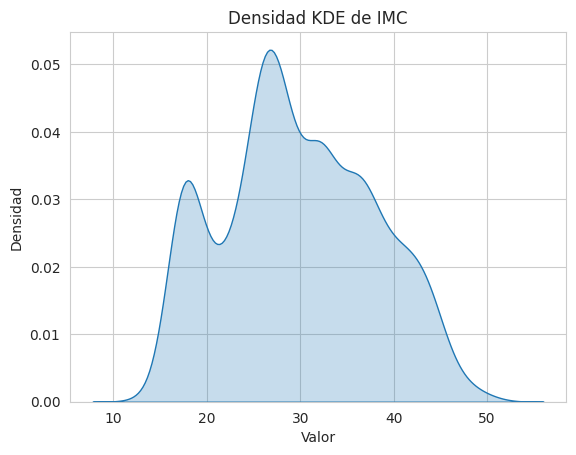

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(df['IMC'], fill=True)
plt.title("Densidad KDE de IMC")
plt.xlabel("Valor")
plt.ylabel("Densidad")

Con este gráfico es más fácil visualizar los datos mencionados arriba, por ejemplo vemos claramente a la moda, que es el valor más frecuente de todos, en el pico más alto. Además, verlo de esta manera nos da una idea de que distribución estadística podría estar tomando. Hubiera pensado que los datos se distribuirían de manera normal, pero el gráfico cuenta con dos picos que no son típicos de una campana de gauss.

*family_history_with_overweight (Historial de familia con sobrepeso)*

Text(0.5, 1.0, 'Frecuencia de la Variable Categórica')

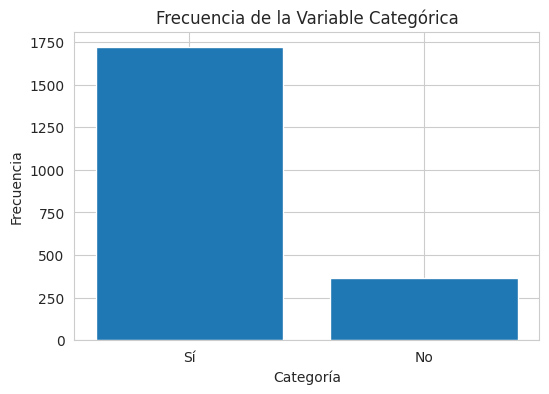

In [ ]:
frecuencia_si = (df['family_history_with_overweight'] == "yes").sum()
frecuencia_no = (df['family_history_with_overweight'] == "no").sum()
categorias = ['Sí', 'No']
frecuencias = [frecuencia_si, frecuencia_no]
plt.figure(figsize=(6, 4))
plt.bar(categorias, frecuencias)
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de la Variable Categórica")

Observamos que la mayoría de personas tienen un historial de sobrepeso en sus familias.

*MTrans (Transporte usado con frecuencia)*

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Public_Transportation'),
  Text(1, 0, 'Automobile'),
  Text(2, 0, 'Walking'),
  Text(3, 0, 'Motorbike'),
  Text(4, 0, 'Bike')])

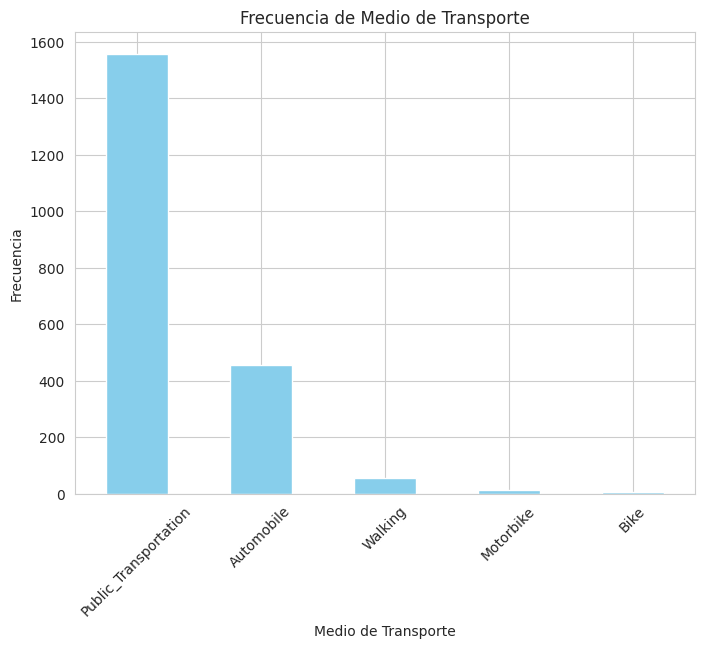

In [ ]:
frecuencias = df['MTRANS'].value_counts()
plt.figure(figsize=(8, 6))
frecuencias.plot(kind='bar', color='skyblue')
plt.xlabel('Medio de Transporte')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Medio de Transporte')
plt.xticks(rotation=45)

Aquí podemos ver la cantidad de personas que usa cada transporte público.

*NObeyesdad (Clasificación de tipo de peso)*

(-1.0999991081990084,
 1.0999999575332862,
 -1.099999906009211,
 1.0999999808944514)

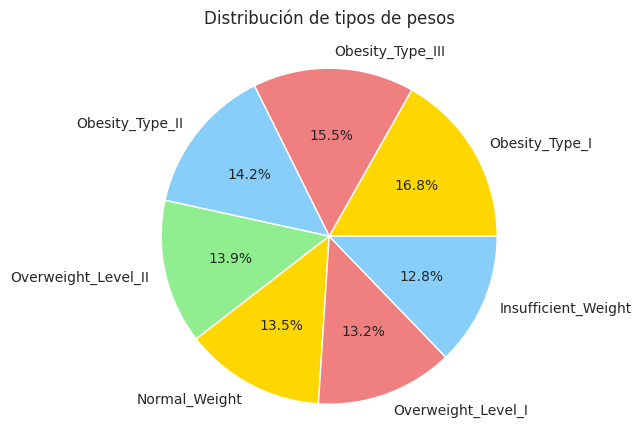

In [ ]:
conteo = df['NObeyesdad'].value_counts()
etiquetas = conteo.index
valores = conteo.values
colores = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%')
plt.title('Distribución de tipos de pesos', pad=20)
plt.axis('equal')

Vemos que la cantidad de gente dentro de cada categoría es bastante pareja.

**ANÁLISIS BIVARIADO**

Ahora que ya se ha realizado un análisis univariado del dataset, será de utilidad hacer uno bivariado, que contendrá las relaciones entre variables que luego servirán para plantear problemas y preguntas de interés. En algunos casos será necesario que mis variables categóricas sean numéricas, por lo cual también voy a plantear el siguiente dataset.

In [ ]:
columnas_a_mantener = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'FAF', 'IMC', 'CH2O', 'TUE', 'NObeyesdad']
nuevo_df = df[columnas_a_mantener].copy()
calculo_mapping = {'no': 1, 'Sometimes': 2, 'Frequently': 3, 'Always': 4}
nuevo_df['CALC_numeric'] = df['CALC'].map(calculo_mapping)
mtrans_mapping = {'Automobile': 0, 'Public_Transportation': 1, 'Motorbike': 2, 'Bike': 3, 'Walking': 4}
nuevo_df['MTRANS_numeric'] = df['MTRANS'].map(mtrans_mapping)
family_history_mapping = {'yes': 1, 'no': 2}
nuevo_df['family_history_numeric'] = df['family_history_with_overweight'].map(family_history_mapping)
gender_mapping = {'Female': 1, 'Male': 2}
nuevo_df['gender_numeric'] = df['Gender'].map(gender_mapping)
favc_mapping = {'yes': 2, 'no': 1}
nuevo_df['favc_numeric'] = df['FAVC'].map(favc_mapping)


*MTRANS (Transporte) y FAF (Ejercicio por semana)*


In [ ]:
correlation, p_value = stats.pointbiserialr(nuevo_df['MTRANS_numeric'], nuevo_df['FAF'])

print(f"Coeficiente de correlación biserial puntual: {correlation}")
print(f"Valor p: {p_value}")

Coeficiente de correlación biserial puntual: 0.0858258242832079
Valor p: 7.871737785244294e-05


El coeficiente que nos da significa que la correlación entre el transporte más utilizado por cada individuo y la cantidad de veces que ejercitan a la semana es baja.

*GENDER (Género) e IMC (Índice de masa corporal)*

In [ ]:
correlation = nuevo_df['gender_numeric'].corr(nuevo_df['IMC'])
print(f"El coeficiente de correlación entre gender_numeric e IMC es: {correlation}")

El coeficiente de correlación entre gender_numeric e IMC es: -0.053035240943886765


Esto nos indicaría que no hay una correlación fuerte entre el género de la persona y su peso, es decir que es indistinto que sea hombre o mujer para cualquiera de los pesos.

*NObeyesdad (clasificación de peso) y FAF (Ejercico por semana)*

In [ ]:
contingency_table = pd.crosstab(nuevo_df['NObeyesdad'], nuevo_df['FAF'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"El valor de chi-cuadrado es {chi2} y el p-valor es {p}")

El valor de chi-cuadrado es 7674.2285682771835 y el p-valor es 4.961175347728524e-06


Dado que el valor del chi-cuadrado nos dio alto y el p-valor bajo, podría indicar que existen una relación significativa, entre el tipo de peso de una persona y la cantidad de veces que ejercitan por semana.

*CALC (Frecuencia de consumo de alcohol) y NObeyesdad (clasificación de peso)*

In [ ]:
contingency_table = pd.crosstab(nuevo_df['CALC_numeric'], nuevo_df['NObeyesdad'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"El valor de chi-cuadrado es {chi2} y el p-valor es {p}")

El valor de chi-cuadrado es 335.56492860157624 y el p-valor es 2.220939673104344e-60


En este caso, tenemos un valor de chi-cuadrado más pequeño pero el p-valor nos sigue dando muy pequeño, por lo cual podríamos decir que si existe una correlación entre la frecuencia con que se consume alcohol y el tipo de peso.

*FAVC (Consumo de comidas calóricas) y FCVC (Consumo de vegetales)*

In [ ]:
correlation = nuevo_df['favc_numeric'].corr(nuevo_df['FCVC'])
print(f"El coeficiente de correlación entre favc_numeric y FCVC es: {correlation}")

El coeficiente de correlación entre favc_numeric y FCVC es: -0.025418590096522795


Dado el coeficiente obtenido, podríamos decir que la correlación es muy baja entre el consumo de comidas calóricas y de vegetales.

*FAVC (Consumo comida calorica) e IMC (Índice de masa corporal)*

In [ ]:
correlation = nuevo_df['favc_numeric'].corr(nuevo_df['IMC'])
print(f"El coeficiente de correlación entre favc_numeric e IMC es: {correlation}")

El coeficiente de correlación entre favc_numeric e IMC es: 0.24736835083331177


En este caso, obtuvimos un coeficiente de mayor magnitud, es decir que existe una correlación significativa entre el índice de masa corporal y el consumo de comidas calóricas.

*NCP (Comidas al día) e IMC (índice de masa corporal)*

In [ ]:
bins = [1, 2, 3, 4]
df['NCP_bins'] = pd.cut(df['NCP'], bins=bins, right=False)
promedio_IMC_por_bins = df.groupby('NCP_bins')['IMC'].mean()
print(promedio_IMC_por_bins)

NCP_bins
[1, 2)    27.553630
[2, 3)    30.429202
[3, 4)    30.697116
Name: IMC, dtype: float64


Para analizar la correlación entre estas dos variables decidí ver cual es el promedio de IMC, según la cantidad de comidas que consume el individuo por día. Vemos que a medida que se comen más comidas, el individuo come una cantidad de veces mayor por día. Existe una pequeña corelación.

Para finalizar con el análisis bivariado, observamos aquí todas las correlaciones entre las variables

<ipython-input-29-be4a25cbd361>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nuevo_df.corr()


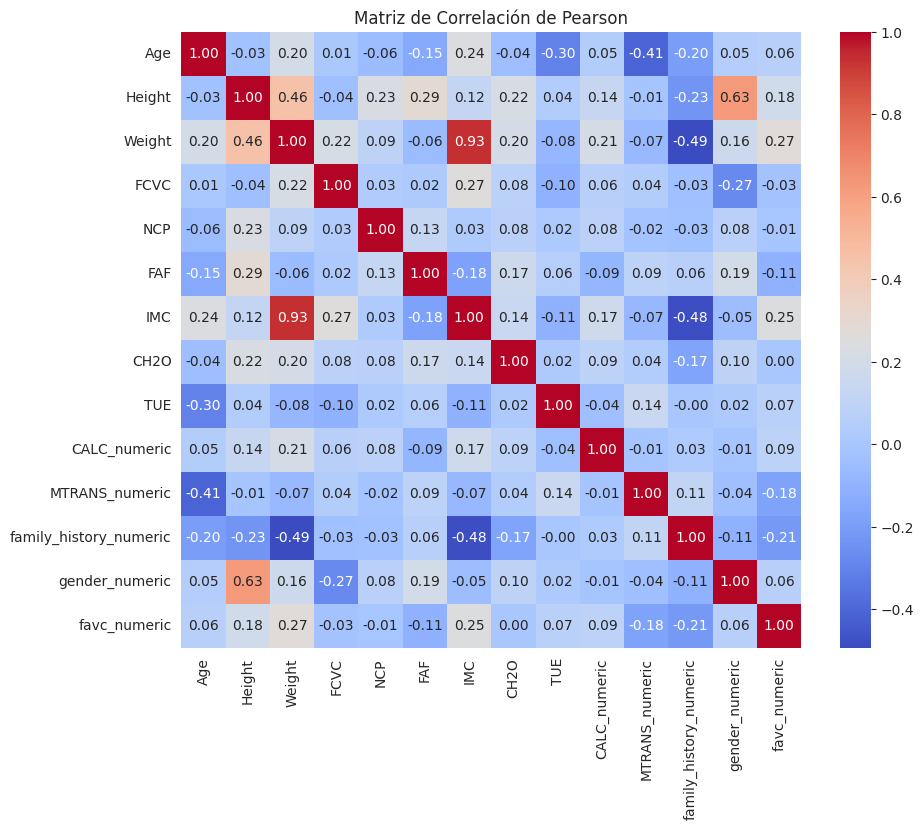

In [ ]:
correlation_matrix = nuevo_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación de Pearson')
plt.show()

A continuación plantearemos las preguntas que queremos responder con el análisis de datos.

# ***Preguntas de interés***

1.   ¿Hay alguna relación entre el tipo de transporte usado y las veces que ejercita cada persona?
2.   ¿Cómo se relaciona el IMC con el hecho de que la persona ingiera con frecuencia comida calórica?
3. ¿Hay alguna relación entre las personas que toman alcohol y las que fuman?
4. ¿Cómo es la distribución de la altura con respecto al peso?
5. ¿Existe alguna diferencia en el IMC para hombres y mujeres?

6. ¿La gente que come más comidas calóricas es propensa a comer menos vegetales?

7. ¿Se relaciona el IMC de la persona con la cantidad de comidas que consume en un día?

8. ¿Las personas con familia con sobrepeso son más propensas a tenerlo también?

9. ¿Cual es la relación entre las personas que consumen alcohol y las que padecen de sobrepeso?

10. ¿Con que frecuencia se ejercitan las personas según su peso?

11. ¿Las personas que cuentan la cantidad de calorías que consumen al día tienden a pesar menos?




**PREGUNTA 1**

In [ ]:
#Con este código, agrego una columna que le asigna un valor númerico a cada elemento de la columna MTRANS
label_encoder = LabelEncoder()
mapeo_personalizado = {
    'Automobile': 0,
    'Public_Transportation': 1,
    'Motorbike': 2,
     'Bike': 3,
     'Walking': 4
}
label_encoder.classes_ = [categoria for categoria, valor in sorted(mapeo_personalizado.items(), key=lambda x: x[1])]
df['MTRANS_Num'] = label_encoder.fit_transform(df['MTRANS'])


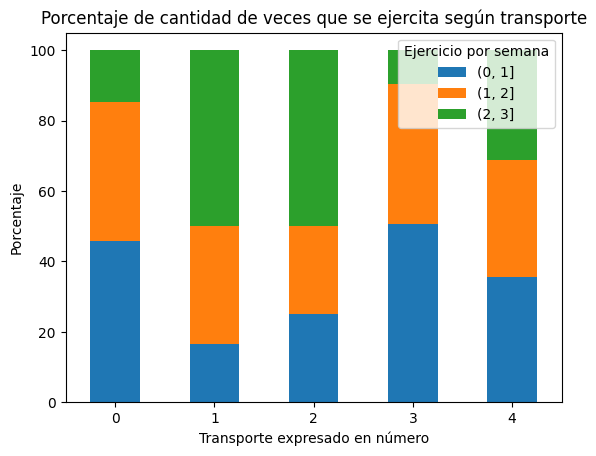

In [ ]:
bins = [0, 1, 2, 3]
df['FAF_Category'] = pd.cut(df['FAF'], bins)

result = df.groupby(['MTRANS_Num', 'FAF_Category']).size().unstack(fill_value=0)
result_percentage = result.div(result.sum(axis=1), axis=0) * 100

result_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Transporte expresado en número')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de cantidad de veces que se ejercita según transporte')
plt.legend(title='Ejercicio por semana', loc='upper right')
plt.xticks(rotation=0)
plt.show()


In [ ]:
descripcion = df[['MTRANS_Num', 'FAF']].describe()
print(descripcion)

        MTRANS_Num          FAF
count  2111.000000  2111.000000
mean      2.365230     1.010298
std       1.261423     0.850592
min       0.000000     0.000000
25%       3.000000     0.124505
50%       3.000000     1.000000
75%       3.000000     1.666678
max       4.000000     3.000000


*Conclusión de la pregunta 1*

Para esta pregunta, en un primer lugar me dispuse a asignarle un valor numérico a cada medio de transporte utilizado. El valor de cada uno no fue al azar, sino que están ordenados por nivel de esfuerzo fisíco que requiere cada uno (siendo el auto el que menos necesita, y la caminata el que más). Aquí abajo los dejaré expresados:

0 = Automóvil

1 = Transporte público

2 = Moto

3 = Bicicleta

4 = Caminata

Mi hipótesis para esta pregunta era que el nivel de esfuerzo físico realizado por cada persona para transportarse estaría relacionado con la cantidad de veces que ejercita. Es decir, las personas que más esfuerzo hacen para transportarse, como por ejemplo al caminar, serían más propensas a ejercitar un número de veces mayor que las demás.

Para comprobar si esta relación efectivamente existía, realicé un gráfico en el que podemos ver procentualmente la cantidad de veces que ejercita cada persona que usa cierto transporte.

Sin embargo, al ver los resultados, noté que las personas que tendían a ejercitar más estaban en el grupo del transporte público y de moto. Mi hipótesis no se cumplió.


**PREGUNTA 2**

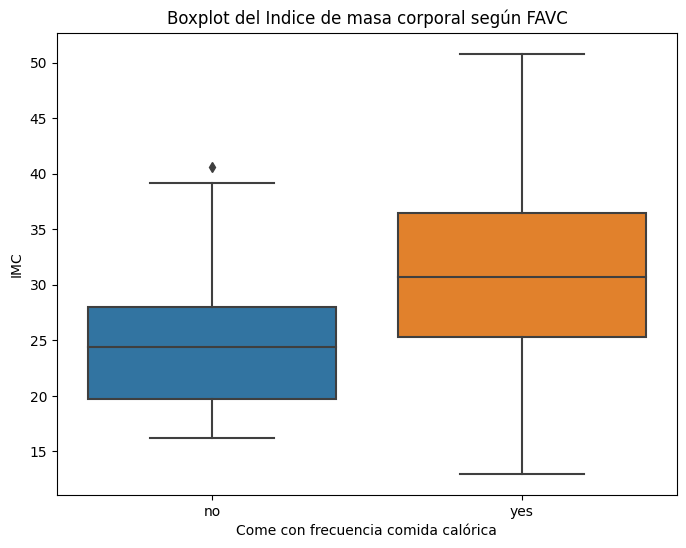

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAVC', y='IMC', data=df)
plt.xlabel('Come con frecuencia comida calórica')
plt.ylabel('IMC')
plt.title('Boxplot del Indice de masa corporal según FAVC')
plt.show()

In [ ]:
descripcion_IMC = df[['IMC']].describe()
print(descripcion_IMC)

               IMC
count  2111.000000
mean     29.700159
std       8.011337
min      12.998685
25%      24.325802
50%      28.719089
75%      36.016501
max      50.811753


*Conclusión de la pregunta 2*

En este caso, el objeto de análisis era ver la relación entre el índice de masa corporal y si comían comida calórica con frecuencia. Mi hipótesis era que las personas que consumían este tipo de alimentos contarían con un IMC mayor. Como era de esperarse, esto efectivamente fue así. Podemos ver claramente en los boxplots que la mediana de las personas que si comen con frecuencia comida calórica está considerablemente más arriba (es decir, un IMC mayor) que los que no.

**PREGUNTA 3**

In [ ]:
label_encoder = LabelEncoder()
mapeo_personalizado_CALC = {
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
     'Always': 4,
}
label_encoder.classes_ = [categoria for categoria, valor in sorted(mapeo_personalizado_CALC.items(), key=lambda x: x[1])]
df['CALC_Num'] = label_encoder.fit_transform(df['CALC'])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

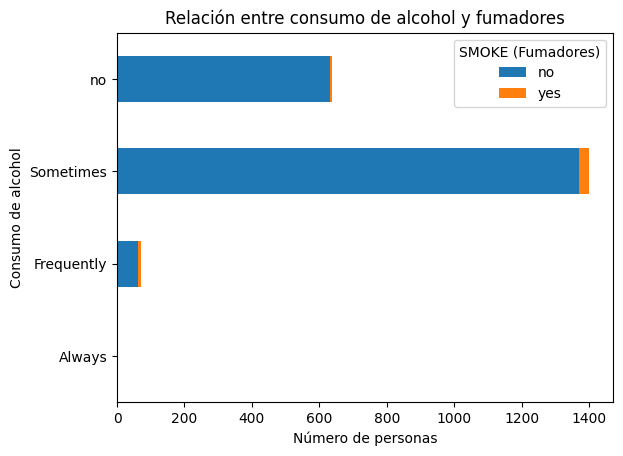

In [ ]:
tabla_contingencia = pd.crosstab(df['CALC'], df['SMOKE'])

tabla_contingencia.plot(kind='barh', stacked=True)
plt.xlabel('Número de personas')
plt.ylabel('Consumo de alcohol')
plt.title('Relación entre consumo de alcohol y fumadores')
plt.legend(title='SMOKE (Fumadores)', loc='upper right')
plt.xticks(rotation=0)

In [ ]:
descripcion_CALC_Num = df[['CALC_Num']].describe()
print(descripcion_CALC_Num)

          CALC_Num
count  2111.000000
mean      2.268593
std       0.515498
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       3.000000


*Conclusión de la pregunta 3*

Mi hipótesis para esta pregunta era que las personas que más alcohol toman, serían también propensas a fumar, es decir que tendrían hábitos menos saludables.

Vemos en el gráfico que la mayor cantidad de personas que fuman se encuentra en 'Sometimes' (A veces), dado que es la catégoria con más personas. Sin embargo, podemos observar que en la barra de 'Frequently' (frecuentemente) hay apenas un poco menos de personas que fuman, pero considerablemente menos personas que no fuman. Esto quiere decir que la proporción es mayor para esta catégoria. Esto podría ser un indicador de que mi hipótesis era correcta, que las personas que toman frecuentemente alcohol, también tienen más probabilidades de ser fumadoras.

**PREGUNTA 4**

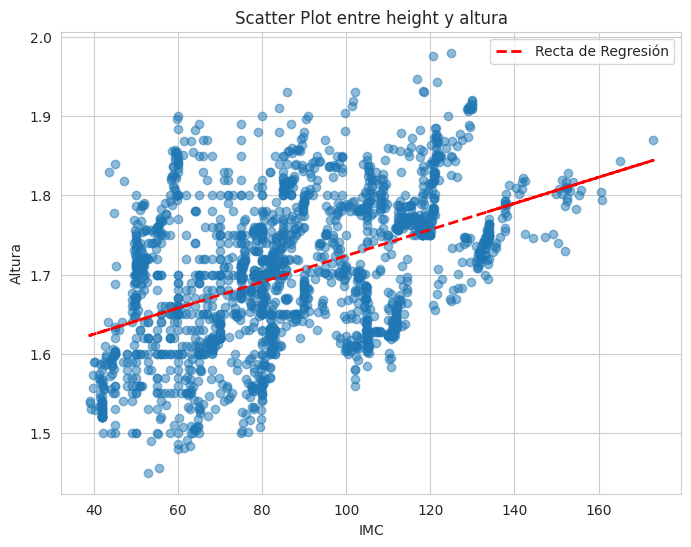

In [ ]:
x = df['Weight']
y = df['Height']
coefficients = np.polyfit(x, y, 1)
m, b = coefficients
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('IMC')
plt.ylabel('Altura')
plt.title('Scatter Plot entre height y altura')
plt.grid(True)
plt.plot(x, m * x + b, color='red', linestyle='--', linewidth=2, label='Recta de Regresión')
plt.legend()

In [ ]:
descripcion_HW = df[['Height', 'Weight']].describe()
print(descripcion_HW)

            Height       Weight
count  2111.000000  2111.000000
mean      1.701677    86.586058
std       0.093305    26.191172
min       1.450000    39.000000
25%       1.630000    65.473343
50%       1.700499    83.000000
75%       1.768464   107.430682
max       1.980000   173.000000


*Conclusión de la pregunta 4*

Para esta pregunta, mi hipótesis era que la relación entre ambas variables sería bastante lineal. Al observar el gráfico vemos que hay una pequeña tendencia de crecimiento, pero la relación no es muy fuerte. Esto probablemente se deba a que en las alturas donde contamos con más datos, las cercanas a la media, hay una mayor variedad de pesos.

**PREGUNTA 5**

Text(0.5, 1.0, 'Gráfico de Violín entre Género e IMC')

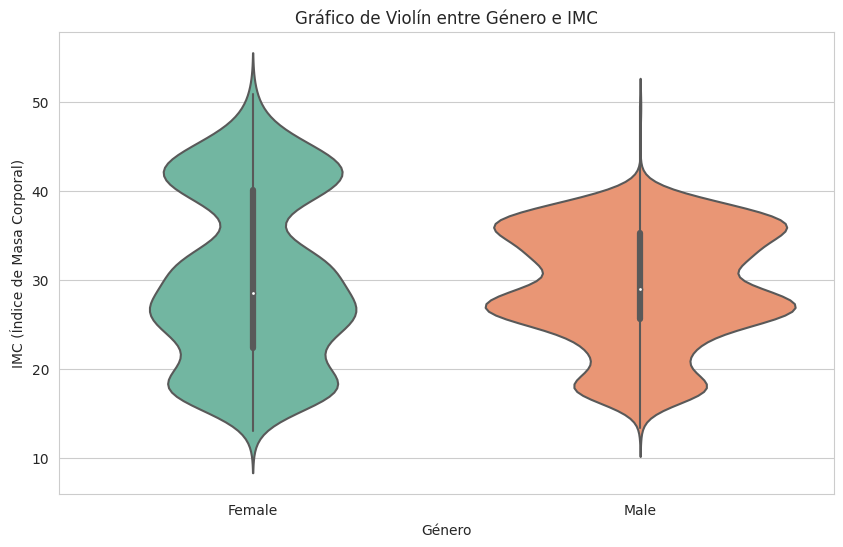

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='IMC', data=df, palette='Set2')
plt.xlabel('Género')
plt.ylabel('IMC (Índice de Masa Corporal)')
plt.title('Gráfico de Violín entre Género e IMC')

In [ ]:
descripcion_por_genero = df.groupby('Gender')['IMC'].describe()
print(descripcion_por_genero)

         count       mean       std        min        25%        50%  \
Gender                                                                 
Female  1043.0  30.130002  9.399448  12.998685  22.363653  28.465346   
Male    1068.0  29.280377  6.346875  13.291588  25.572407  28.905612   

              75%        max  
Gender                        
Female  40.084283  50.811753  
Male    35.219092  49.472390  


*Conclusión de la pregunta 5*

Con respecto a esta pregunta, mi suposición era que la distribución del IMC iba a ser prácticamente igual para cada género, o a lo sumo habrían más hombres con un índice mayor. No obstante, ocurrió lo contrario a lo que pensaba. Las mujeres tienen una concentración mayor de datos en índices altos de masa corporal, mientras que los hombres se concentran la mayoría en un valor por debajo.

**PREGUNTA 6**

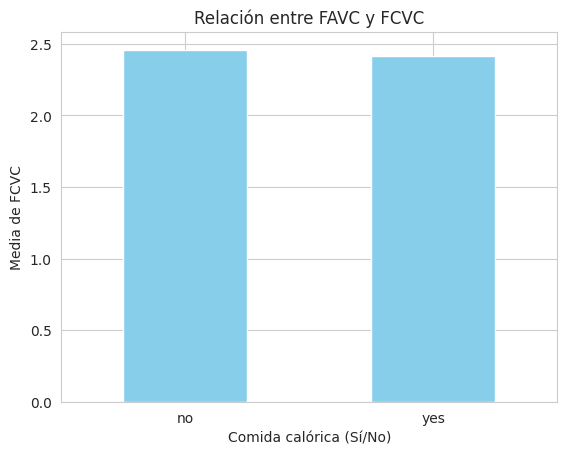

In [ ]:
grouped_data = df.groupby('FAVC')['FCVC'].mean()
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Comida calórica (Sí/No)')
plt.ylabel('Media de FCVC')
plt.title('Relación entre FAVC y FCVC')
plt.xticks(rotation=0)
plt.show()

In [ ]:
descripcion_FCVC = df[['FCVC']].describe()
print(descripcion_FCVC)

              FCVC
count  2111.000000
mean      2.419043
std       0.533927
min       1.000000
25%       2.000000
50%       2.385502
75%       3.000000
max       3.000000


*Conclusión pregunta 6*

En este caso, la pregunta iba dirigida a buscar una relación entre si las personas que comen con frecuencia comida calórica, además suelen comer menos vegetales. Mi hipótesis para esto era que las personas que más comidas calóricas comían, menos vegetales consumían, es decir que se alimentaban asiduamente de comida chatarra. Me sorprendió encontrarme con que este no era el caso, en el gráfico observamos perfectamente que el promedio de consumo de vegetales es el mismo para las personas que comen o no comida calórica.

**PREGUNTA 7**

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, '0-1'),
  Text(0.5, 0, ''),
  Text(1.0, 0, '1-2'),
  Text(1.5, 0, ''),
  Text(2.0, 0, '2-3'),
  Text(2.5, 0, ''),
  Text(3.0, 0, '3-4'),
  Text(3.5, 0, '')])

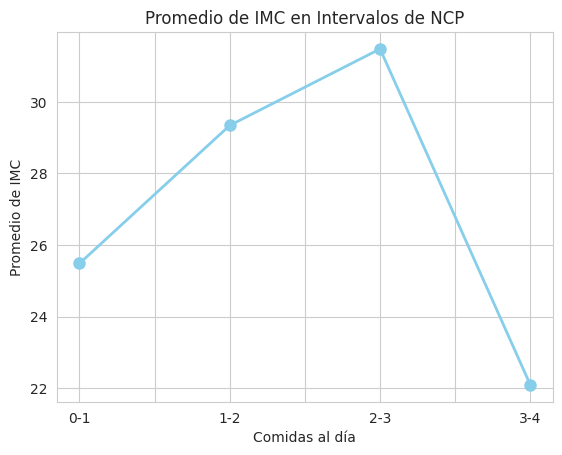

In [ ]:
ncp_bins = [0, 1, 2, 3, 4, 5]
ncp_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['NCP Intervalo'] = pd.cut(df['NCP'], bins=ncp_bins, labels=ncp_labels, include_lowest=True)
average_imc_by_ncp = df.groupby('NCP Intervalo')['IMC'].mean()
average_imc_by_ncp.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Comidas al día')
plt.ylabel('Promedio de IMC')
plt.title('Promedio de IMC en Intervalos de NCP')
plt.xticks(rotation=0)

*Conclusión pregunta 7*

Para este caso, me interesaba saber si las personas que más comidas al día consumían también eran las que mayor índice de masa corporal tenían en promedio. En el eje X, está expresada la cantidad de comidas al día que ingiere cada individuo, y en el Y el promedio de IMC para cada uno de estos grupos. Mi hipótesis en efecto se cumplió, al menos para las primeras 3 categorías, ya que el promedio fue aumentando.
Para la categoría 3-4, sospecho que el promedio dio bajo dado que era la categoría con más datos, como se ve en la lista a continuación. Esto quiere decir que había más variedad.

In [ ]:
filtered_data = df.loc[(df['NCP'] >= 3) & (df['NCP'] <= 4), ['NCP', 'IMC']]
print(filtered_data)

      NCP        IMC
0     3.0  24.386526
1     3.0  24.238227
2     3.0  23.765432
3     3.0  26.851852
5     3.0  20.195092
...   ...        ...
2106  3.0  44.901475
2107  3.0  43.741923
2108  3.0  43.543817
2109  3.0  44.071535
2110  3.0  44.144338

[1431 rows x 2 columns]


**PREGUNTA 8**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

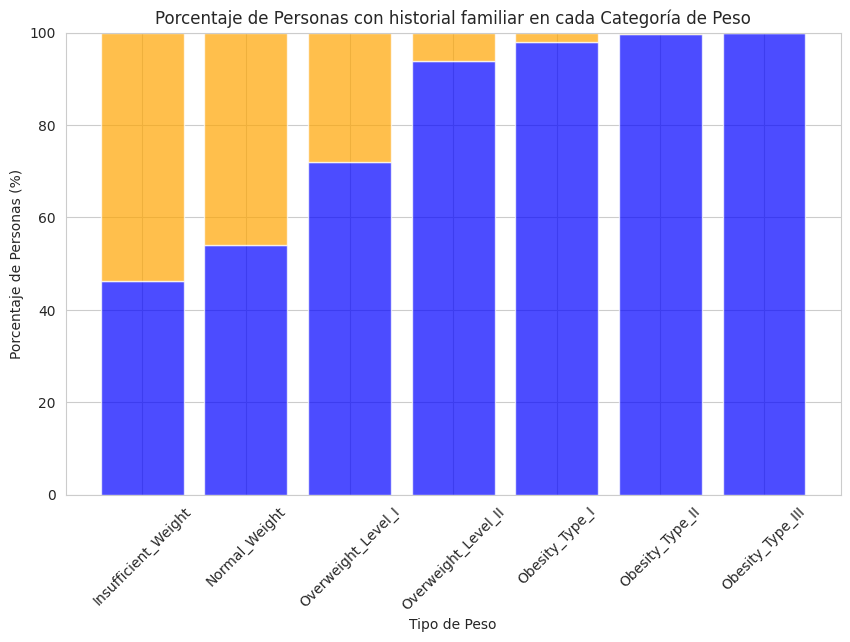

In [ ]:
orden_deseado = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'], categories=orden_deseado, ordered=True)
pivot_table = df.pivot_table(index='NObeyesdad', columns='family_history_with_overweight', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['no'] + pivot_table['yes']
pivot_table['Porcentaje_yes'] = (pivot_table['yes'] / pivot_table['Total']) * 100
pivot_table['Porcentaje_No'] = (pivot_table['no'] / pivot_table['Total']) * 100

plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index, pivot_table['Porcentaje_yes'], label='Yes', color='blue', alpha=0.7)
plt.bar(pivot_table.index, pivot_table['Porcentaje_No'], bottom=pivot_table['Porcentaje_yes'], label='No', color='orange', alpha=0.7)
plt.xlabel('Tipo de Peso')
plt.ylabel('Porcentaje de Personas (%)')
plt.title('Porcentaje de Personas con historial familiar en cada Categoría de Peso')
plt.xticks(rotation=45)

*Conclusión pregunta 8*

Mi hipótesis para esta pregunta era que las personas que contaran con familiares que sufrieron de sobrepeso, en general padecerían de esto ellas también. En este gráfico se ve muy claro que esto es así, vemos el porcentaje de personas para cada categoría que tienen familiares con sobrepeso, y este aumenta a medida que pasamos a una categoría de peso mayor (el color azul es el porcentaje que si tiene, en la ultima categoría todos poseen).

### **PREGUNTA 9**

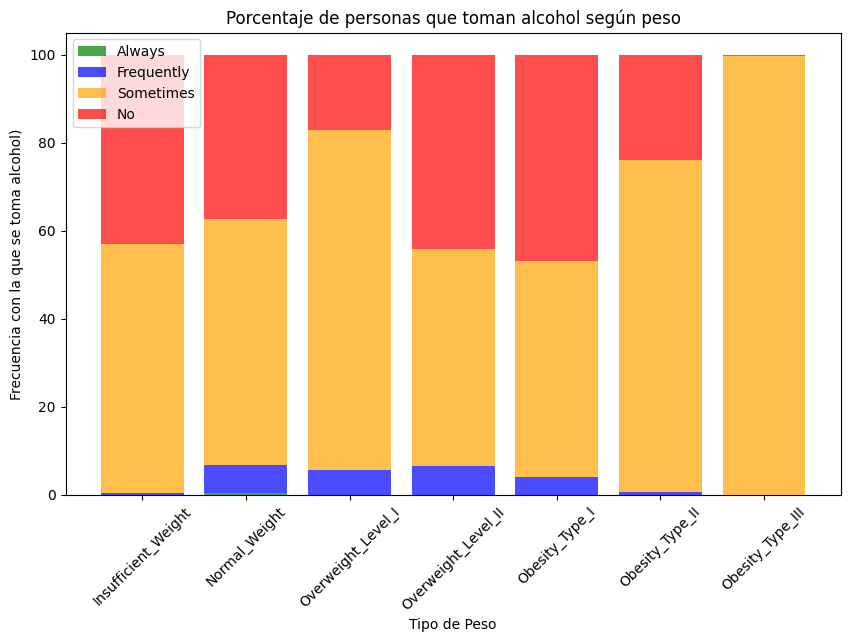

In [ ]:
filt = df['CALC'].isin(['no', 'Sometimes', 'Frequently', 'Always'])
filtered_df = df[filt]
pivot_table_CALC = filtered_df.pivot_table(index='NObeyesdad', columns='CALC', aggfunc='size', fill_value=0)
pivot_table_CALC = pivot_table_CALC.reindex(orden_deseado)
pivot_table_CALC['Total'] = pivot_table_CALC.sum(axis=1)
columns_to_calculate = pivot_table_CALC.columns[:-1]
for col in columns_to_calculate:
    pivot_table_CALC[f'Porcentaje_{col}'] = (pivot_table_CALC[col] / pivot_table_CALC['Total']) * 100
    pivot_table_CALC[f'Porcentaje_{col}'] = pivot_table_CALC[f'Porcentaje_{col}'].round(2)

plt.figure(figsize=(10, 6))

bottom = np.zeros(len(pivot_table_CALC))
colors = ['green', 'blue', 'orange', 'red']

for i, col in enumerate(columns_to_calculate):
    plt.bar(
        pivot_table_CALC.index,
        pivot_table_CALC[f'Porcentaje_{col}'],
        bottom=bottom,
        label=col.capitalize(),
        color=colors[i],
        alpha=0.7
    )
    bottom += pivot_table_CALC[f'Porcentaje_{col}']

plt.xlabel('Tipo de Peso')
plt.ylabel('Frecuencia con la que se toma alcohol)')
plt.title('Porcentaje de personas que toman alcohol según peso')
plt.xticks(rotation=45)
plt.legend()

plt.show()

*Conclusión pregunta 9*

Observamos que no hay una relación tan directa entre tener sobrepeso y tomar alcohol, pero podríamos decir que hay una pequeña conexión, dado que los de la última categoría (el tipo de obesidad más grave) todos toman de vez en cuando, mientras que en la primera categoria por ejemplo hay un porcentaje considerable que no toma nunca.

### **PREGUNTA 10**

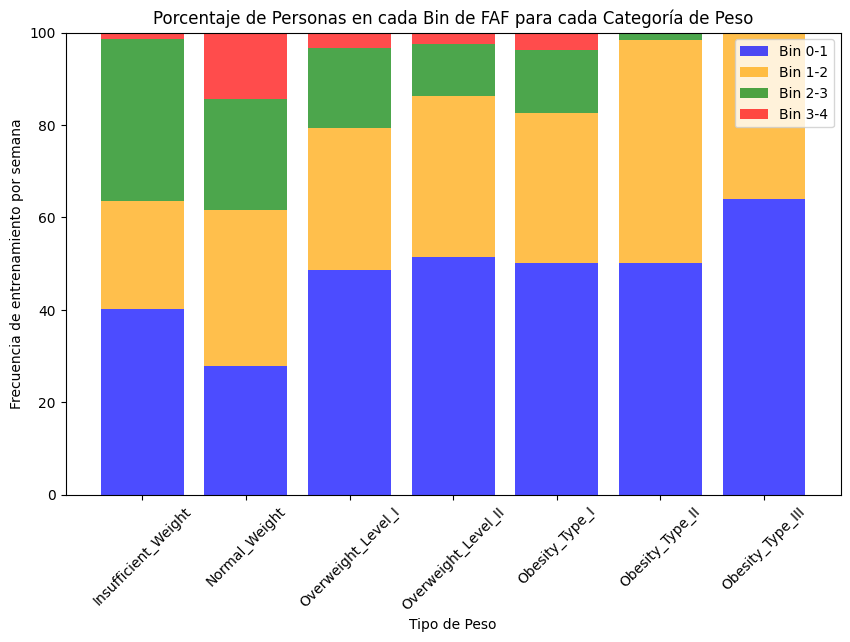

In [ ]:
bins = [0, 1, 2, 3, 4]
labels = ['0-1', '1-2', '2-3', '3-4']
df['FAF_bins'] = pd.cut(df['FAF'], bins=bins, labels=labels, right=False)
pivot_table_FAF = df.pivot_table(index='NObeyesdad', columns='FAF_bins', aggfunc='size', fill_value=0)
pivot_table_FAF = pivot_table_FAF.div(pivot_table_FAF.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red']
for i, label in enumerate(labels):
    plt.bar(
        pivot_table_FAF.index,
        pivot_table_FAF[label],
        bottom=pivot_table_FAF.iloc[:, :i].sum(axis=1) if i > 0 else 0,
        label=f'Bin {label}',
        color=colors[i],
        alpha=0.7
    )

plt.xlabel('Tipo de Peso')
plt.ylabel('Frecuencia de entrenamiento por semana')
plt.title('Porcentaje de Personas en cada Bin de FAF para cada Categoría de Peso')
plt.xticks(rotation=45)
plt.legend()
plt.show()

*Conclusión pregunta 10*

Como era de esperarse, en términos generales, las personas entrenan una cantidad menor de veces cuando sufren de un nivel de peso mayor. En este caso, la cantidad de veces que se ejercita podría ser pensada tanto como una consecuencia de estos problemas de salud, es decir que debido a su peso les cuesta más moverse, como también lo podríamos considerar una causa, es decir que el hecho de hacer menos ejercicio les provocó una subida en su peso.


### **PREGUNTA 11**

In [ ]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    plt.show()

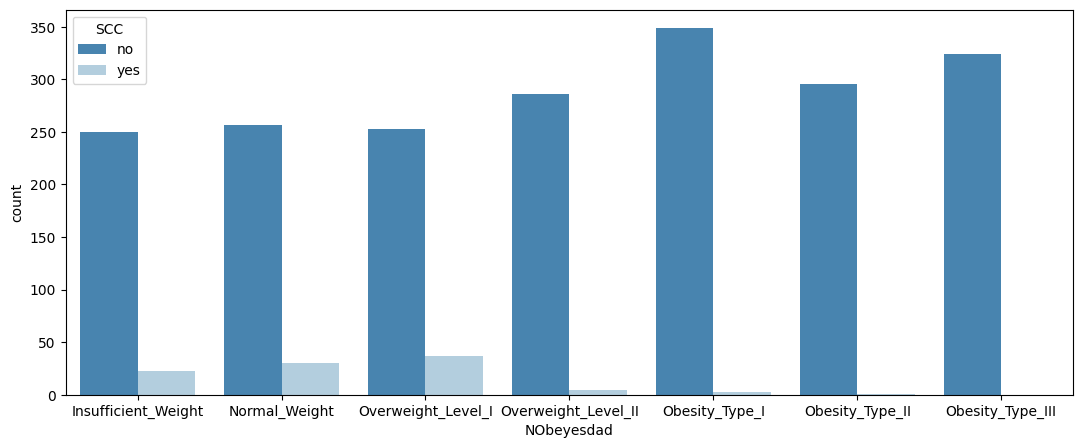

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

La pregunta apuntaba a investigar cuales eran las personas más propensas a contabilizar la cantidad de calorías que consumen en el día, y a partir del gráfico vemos que lo hacen las pertenecientes a las primeras tres categorías, es decir la gente con peso insuficiente, normal y con un poco de sobrepeso. Las personas que sufren de niveles más preocupantes de sobrepeso no suelen contabilizarlo.

## **Contexto comercial y sugerencias**

Desde el punto de vista de una empresa, puede ser de importancia analizar los comportamientos de las personas con respecto a sus hábitos alimenticios y demás aspectos estrechamente relacionados con su salud. Es posible que se puedan generar iniciativas desde dentro de la empresa para generar algún producto o proveer algún servicio que tenga como fin mejorar la salud de sus potenciales clientes. Para comprender mejor estos problemas, se han presentado a lo largo del trabajo una serie de preguntas, de las cuales extraeremos las siguientes conclusiones.

En primer lugar, hemos observado que las personas que tienen familiares con historial de sobrepeso son las más propensas a sufrir de esto también. Por esta razón, una empresa que se dedique a la comercialización de productos saludables, ya sean ciertos alimentos u otras cosas, podría enfocarse en el grupo de gente que ya tuvo familiares con estos problemas. Esto es así dado que son más propensos a sufrir de sobrepeso y tal vez quieran evitarlo o revertir su situación.

Por otro lado, si contaramos con una empresa enfocada a producir alimentos altos en calorías, como lo podría ser una de comidas rápidas, les convendrá promocionar sus productos con personas que ya padezcan de un nivel alto de sobrepeso, debido a que descubrimos que son las personas con más IMC las que consumen alimentos calóricos.

Otra cuestión interesante que hemos descubierto podría ser de utilidad para las empresas que fabrican cigarrillos o bebidas alcohólicas. Dado que había una pequeña correlación entre estas dos variables, es decir que las personas que bebían eran más propensas también a fumar, se podría usar esta información para destinar publicidad de cigarrillos a personas que beben o viceversa.

Por último, hemos llegado también a la conclusión que las personas que más contabilizan la cantidad de calorías al día suelen ser las que cuentan con pesos insuficientes, normales o elevados en pequeña proporción. Una empresa desarrolladora de apps podría crear una que tenga la función de contabilizar las calorías y apuntarla al grupo de personas mencionado.